In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).


# 01 - PROBABILIDAD














## 01.01 Probabilidad teórica

La probabilidad teórica de un suceso es el cociente entre el número de casos favorables y el número total de casos posibles, suponiendo que todos los resultados elementales son igualmente probables:
$$
P(A) = \frac{|A|}{|\Omega|}
$$

Se calcula a partir de un modelo ideal-
Ej. moneda perfecta:

$$
P(\text{cara}) = \frac{\text{casos favorables}}{\text{casos posibles}} = \frac{1}{2} = 0.5
$$

### 01.01.01 Ejemplo Moneda
Calcula las siguientes probabilidades para una moneda:

In [2]:
## Definición del espacio muestral
casos_posibles = 2   # cara, cruz
casos_favorables = 1 # solo cara

P_cara = casos_favorables / casos_posibles
P_cara

0.5

**Probabilidad de obtener 3 caras consecutivas**
$$
P(\text{3 caras}) = P(\text{cara})^3 = \left(\frac{1}{2}\right)^3 = \frac{1}{8}
$$

In [3]:
# Probabilidad de cara en una moneda perfecta
p_cara = 0.5

# Probabilidad de obtener 3 caras consecutivas
P_3_caras = p_cara ** 3
P_3_caras

0.125

**Probabilidad de obtener al menos una cruz en 3 lanzamientos**

$$
P(\geq 1\ \text{cruz}) = 1 - P(\text{ninguna cruz})
$$

Como no obtener ninguna cruz equivale a obtener tres caras seguidas:

$$
P(\geq 1\ \text{cruz}) = 1 - \left(\frac{1}{2}\right)^3
$$

In [4]:
# Probabilidad de cara en una moneda perfecta
p_cara = 0.5

# Probabilidad de obtener al menos una cruz en 3 lanzamientos
P_al_menos_una_cruz = 1 - (p_cara ** 3)
P_al_menos_una_cruz

0.875

**Probabilidad de obtener k caras en n lanzamientos**

Sea X el número de caras obtenidas en n lanzamientos de una moneda perfecta.  
La probabilidad teórica de obtener exactamente k caras viene dada por:

$$
P(X = k) = \binom{n}{k} \left(\frac{1}{2}\right)^n
$$

Esta expresión define la distribución binomial para una moneda equilibrada.

In [5]:
import math

def probabilidad_k_caras(n, k):
    """
    Calcula la probabilidad de obtener k caras
    en n lanzamientos de una moneda perfecta.
    """
    return math.comb(n, k) * (0.5 ** n)

# Ejemplo: exactamente 2 caras en 5 lanzamientos
probabilidad_k_caras(n=5, k=2)

0.3125

**Probabilidad de obtener al menos una racha de 3 caras consecutivas**

- Consideramos una moneda perfecta lanzada 10 veces.  
- Queremos calcular la probabilidad de que aparezca **al menos una racha de tres caras seguidas** en la secuencia.

Este evento no puede calcularse directamente con la distribución binomial, ya que depende del **orden** de los resultados y de **eventos solapados**.

Una forma analítica es calcular el complemento: Que **no aparezca ninguna racha de 3 caras consecutivas**. Esto equivale a contar todas las secuencias de 10 lanzamientos que **no contienen** el patrón `CCC`.

La probabilidad buscada es:

$$
P(\text{al menos una racha de 3 caras}) = 1 - \frac{\text{número de secuencias sin } CCC}{2^{10}}
$$

El conteo exacto puede hacerse mediante relaciones de recurrencia o cadenas de Markov, pero resulta algebraicamente complejo.

## 01.02 Probabilidad estadística
Se calcula a partir de observaciones reales, y puede diferir del valor teórico. Ej, tirar una moneda muchas veces.

### 01.02.01 Ejemplo Titanic
Calcula las siguientes probabilidades a partir del conjunto de datos `df_titanic` para un pasajero:

- probabilidad de morir
- probabilidad de ser mujer
- probabilidad de pertenecer a cada clase (Pclass)
- probabilidad de tener menos de 18 años
- probabilidad de haber pagado más de 50 dólares por el billete

In [6]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/refs/heads/main/Data/titanic.csv'

# Importa csv
df_titanic = pd.read_csv(url)

# Visualización primeras filas
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Probabilidad de fallecer**



La fórmula será: P(Falleció) = (Número de pasajeros que murieron) / (Número total de pasajeros).


In [7]:
filtro_evento = df_titanic['Survived'] == 0

num_fallecidos = filtro_evento.sum()
total_pasajeros = len(df_titanic)
prob_fallecer = num_fallecidos / total_pasajeros

print(f"Númbero de fallecidos: {num_fallecidos}")
print(f"Total pasajeros: {total_pasajeros}")
print(f"Probabilidad de que un pasajero fallezca: {prob_fallecer:.4f}")

Númbero de fallecidos: 549
Total pasajeros: 891
Probabilidad de que un pasajero fallezca: 0.6162


**Probabilidad de ser mujer**

La fórmula será: P(Mujer) = (Número de pasajeros mujeres) / (Número total de pasajeros).


In [13]:
filtro = df_titanic["Sex"] == "female"

num_mujeres = filtro.sum()
total_pasajeros = len(df_titanic)
prob_ser_mujer = num_mujeres / total_mujeres

print(f"Número de mujeres: {num_mujeres}")
print(f"Total mujeres: {total_pasajeros}")
print(f"Probabilidad de que sea mujer: {prob_ser_mujer:.4f}")


Número de mujeres: 314
Total mujeres: 891
Probabilidad de que sea mujer: 0.3524


**Probabilidad de clase**

La fórmula de la probabilidad de pertenecer a cada clase: P(clase X) = (Número de pasajeros en clase X) / (Número total de pasajeros).

In [14]:
clases = df_titanic['Pclass'].sort_values().unique()
clases

array([1, 2, 3])

In [15]:
total_pasajeros = len(df_titanic)

num_clase1 = (df_titanic['Pclass'] == 1).sum()
num_clase2 = (df_titanic['Pclass'] == 2).sum()
num_clase3 = (df_titanic['Pclass'] == 3).sum()

p_clase1 =num_clase1 / total_pasajeros
p_clase2 =num_clase2 / total_pasajeros
p_clase3 = num_clase3 / total_pasajeros

print(f"Probabilidad Clase 1: {p_clase1:.4f}")
print(f"Probabilidad Clase 2: {p_clase2:.4f}")
print(f"Probabilidad Clase 3: {p_clase3:.4f}")

Probabilidad Clase 1: 0.2424
Probabilidad Clase 2: 0.2065
Probabilidad Clase 3: 0.5511


**Probabilidad de edad menor a 18**

La fórmula de la probabilidad de que un pasajero tenga menos de 10 años es: P(Edad<18) = (Número de pasajeros menores de 18) / (Número total de pasajeros).

In [20]:
total_pasajeros = len(df_titanic)
#Aplicamos el filtro, de solo menos de 18
subset_menores = df_titanic[df_titanic["Age"] <18]
pasajeros_menores = len(subset_menores)

p_menores = pasajeros_menores / total_pasajeros

print(f"Total Pasajeros a bordo: {total_pasajeros}")
print(f"Pasajeros identificados como menores (<18): {subset_menores}")
print("-" * 30)
print(f"Probabilidad P(´Age´ < 18): {p_menores:.4f}")
print(f"En porcentaje: {p_menores * 100:.2f}%")

Total Pasajeros a bordo: 891
Pasajeros identificados como menores (<18):      PassengerId  Survived  Pclass                                     Name  \
7              8         0       3           Palsson, Master. Gosta Leonard   
9             10         1       2      Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3          Sandstrom, Miss. Marguerite Rut   
14            15         0       3     Vestrom, Miss. Hulda Amanda Adolfina   
16            17         0       3                     Rice, Master. Eugene   
..           ...       ...     ...                                      ...   
850          851         0       3  Andersson, Master. Sigvard Harald Elias   
852          853         0       3                  Boulos, Miss. Nourelain   
853          854         1       1                Lines, Miss. Mary Conover   
869          870         1       3          Johnson, Master. Harold Theodor   
875          876         1       3         Najib, Miss. Ad

## 01.03 - Probabilidad Simulada
Es un híbrido donde creamos un entorno controlado por ordenador para repetir un experimento miles de veces. Nos permite "crear" nuestros propios datos cuando los reales son escasos o el problema es demasiado complejo para la matemática ideal.

### 01.03.01 - Ejemplo Moneda

In [21]:
tiradas = 10
pd.DataFrame(
    [np.random.choice([1,0], tiradas)],
    columns=[f"Ronda {i}" for i in range(tiradas)]
    )

,Ronda 0,Ronda 1,Ronda 2,Ronda 3,Ronda 4,Ronda 5,Ronda 6,Ronda 7,Ronda 8,Ronda 9
0,0,1,0,0,1,1,0,1,1,0


In [22]:
def simular_lanzamiento_moneda(tiradas):
    df_i = pd.DataFrame(
        [np.random.choice([1,0], tiradas)],
        columns=[f"Ronda {i}" for i in range(tiradas)]
        )
    return df_i

In [23]:
def escenario_simulacion(num_simulaciones, funcion_sim):
    df_sim = pd.DataFrame()
    for _ in range(num_simulaciones):
        df_sim_i = funcion_sim()
        df_sim = pd.concat([df_sim, df_sim_i], ignore_index=True)
    return df_sim

In [24]:
df_1 = escenario_simulacion(
    num_simulaciones = 10000,
    funcion_sim = lambda: simular_lanzamiento_moneda(tiradas=1))
df_1

,Ronda 0
0,1
1,1
2,0
3,0
4,1
...,...
9995,0
9996,0
9997,1
9998,0


In [25]:
(df_1["Ronda 0"] == 1).sum()/10000

np.float64(0.4956)

### 01.03.02 Ejercicios Moneda

#### Probabilidad de obtener 3 caras consecutivas

In [ ]:
# Simulación para Probabilidad de obtener 3 caras consecutivas

In [26]:
n_simulaciones = 1000
n_monedas = 3

matriz_tiradas = np.random.choice([1,0], size = (n_simulaciones, n_monedas))

print("--- Primeros 5 intentos (Filas) ---")
print(matriz_tiradas[:5])
print("-----------------------------------")

sumas_por_fila = np.sum(matriz_tiradas, axis=1)

exitos = sumas_por_fila == 3

probabilidad_empirica = np.mean(exitos)

print(f"Probabilidad Teórica: 0.125 (12.5%)")
print(f"Probabilidad Simulada: {probabilidad_empirica} ({probabilidad_empirica*100:.2f}%)")

--- Primeros 5 intentos (Filas) ---
[[1 1 0]
 [0 1 1]
 [0 1 1]
 [1 1 0]
 [1 1 0]]
-----------------------------------
Probabilidad Teórica: 0.125 (12.5%)
Probabilidad Simulada: 0.116 (11.60%)


#### Probabilidad obtener al menos una cruz en 3 lanzamientos

In [27]:
import numpy as np

# 1. Configuración
n_simulaciones = 10000
n_monedas = 3

# 2. Generamos la matriz (1 = Cara, 0 = Cruz)
matriz = np.random.choice([1, 0], size=(n_simulaciones, n_monedas))

# 3. Lógica de Negocio
# Sumamos las caras por fila.
# Si sumas 3, es que fueron TODO caras.
# Si sumas menos de 3 (0, 1 o 2), es que HUBO al menos una cruz (0).
conteo_caras = matriz.sum(axis=1)

# Creamos el filtro: Queremos los casos donde NO sean todo caras
exitos = conteo_caras < 3

# 4. Resultado
prob = np.mean(exitos)
print(f"Probabilidad de 'Al menos una Cruz': {prob:.4f}")
print(f"Teórica (1 - 0.125): {1 - 0.125}")

Probabilidad de 'Al menos una Cruz': 0.8728
Teórica (1 - 0.125): 0.875


#### Probabilidad racha al menos 3 caras seguidas en 10 lanzamientos

In [28]:
# Simulación para Probabilidad de obtener 3 caras consecutivas
import numpy as np
import pandas as pd

# 1. CONFIGURACIÓN
n_simulaciones = 10000  # Número de experimentos
n_lanzamientos = 10     # Monedas por experimento
busqueda = "111"        # El patrón que buscamos (3 caras seguidas)

# 2. GENERAR DATOS
# Creamos una tabla gigante de 0s y 1s
matriz = np.random.choice([1, 0], size=(n_simulaciones, n_lanzamientos))
df = pd.DataFrame(matriz)

# 3. EL MOTOR DE BÚSQUEDA
# Función que convierte la fila en texto y busca el patrón
def buscar_racha(fila):
    # Paso A: Convertir [1, 0, 1] -> "101"
    # map(str) convierte números a texto, join los pega
    texto = "".join(map(str, fila))

    # Paso B: Preguntar ¿Está "111" dentro del texto?
    return busqueda in texto

# 4. APLICAR Y CALCULAR
# apply(..., axis=1) ejecuta la función fila por fila
resultados = df.apply(buscar_racha, axis=1)

probabilidad = resultados.mean()

print(f"--- ANÁLISIS DE RACHAS ---")
print(f"Patrón buscado: '{busqueda}'")
print(f"Lanzamientos por intento: {n_lanzamientos}")
print("-" * 30)
print(f"Probabilidad Calculada: {probabilidad:.2%}")

--- ANÁLISIS DE RACHAS ---
Patrón buscado: '111'
Lanzamientos por intento: 10
------------------------------
Probabilidad Calculada: 50.94%


# 02 - Probabilidad condicionada

La probabilidad condicionada de un suceso \(A\) dado que ha ocurrido un suceso \(B\) es el cociente entre la probabilidad de que ocurran ambos sucesos y la probabilidad de que ocurra \(B\), siempre que \(P(B) > 0\):

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$


## 02.01 Ejemplo teórico: El Lanzamiento de un Dado

Para ilustrar la fórmula anterior, utilizaremos el ejemplo del dado de 6 caras:

* **Suceso $B$ (Condición):** Sabemos que el resultado ha sido un número **par**. Los resultados posibles son $\{2, 4, 6\}$, por lo que $P(B) = \frac{3}{6} = 0.5$.
* **Suceso $A$:** Queremos saber la probabilidad de que el resultado sea un **4**.
* **Suceso $A \cap B$:** Es la probabilidad de que el número sea 4 **y** sea par al mismo tiempo. Como el 4 es par, solo hay 1 caso favorable $\{4\}$, por lo que $P(A \cap B) = \frac{1}{6}$.

**Aplicando la fórmula:**

$$P(4 \mid \text{par}) = \frac{P(4 \cap \text{par})}{P(\text{par})} = \frac{1/6}{3/6}$$

Al simplificar, los denominadores (6) se eliminan y obtenemos:

$$P(4 \mid \text{par}) = \frac{1}{3} \approx 33.3\%$$

In [29]:
# Resolución del ejemplo

# 1. Definimos el espacio muestral (un dado de 6 caras)
dado = {1, 2, 3, 4, 5, 6}

# 2. Definimos los eventos
evento_par = {2, 4, 6}
evento_cuatro = {4}

In [30]:
# 3. Calculamos la intersección (A ∩ B)
interseccion = evento_cuatro.intersection(evento_par)
interseccion

{4}

In [32]:
# 4. Calculamos las probabilidades
p_b = len(evento_par) / len(dado)
p_a_inter_b = len(interseccion) / len(dado)

# 5. Aplicamos la fórmula de probabilidad condicionada
p_condicionada = p_a_inter_b / p_b

In [33]:
print(f"Probabilidad par, P(B): {p_b:.2f}")
print(f"Probabilidad 4 y par, P(A ∩ B): {p_a_inter_b:.2f}")
print(f"Probabilidad de que sea 4 DADO que es par, P(A|B): {p_condicionada:.2f}")

Probabilidad par, P(B): 0.50
Probabilidad 4 y par, P(A ∩ B): 0.17
Probabilidad de que sea 4 DADO que es par, P(A|B): 0.33


## 02.02 Ejemplo estadístico: Titanic
### 02.02.01 Probabilidad de ser mujer entre menores de 18
La fórmula será: P(Mujer | Edad < 18) = (Número de mujeres menores de 18) / (Número total de pasajeros menores de 18).

In [34]:
print("Probabilidad de ser mujer entre menores de 18:")

filtro_mujeres = df_titanic['Sex'] == 'female'
prob_mujer = filtro_mujeres.sum()/len(df_titanic)
print(f"P(Mujer): {prob_mujer:.4f}")

filtro_menores_18 = df_titanic['Age'] < 18

num_mujeres_menores_18 = (filtro_menores_18 & filtro_mujeres).sum()
total_menores_18 = filtro_menores_18.sum()

prob_mujer_dado_menor_18 = num_mujeres_menores_18 / total_menores_18
print(f"P(Mujer | Edad < 18): {prob_mujer_dado_menor_18:.4f} (Mujeres menores de 18: {num_mujeres_menores_18}, Total menores de 18: {total_menores_18})")

Probabilidad de ser mujer entre menores de 18:
P(Mujer): 0.3524
P(Mujer | Edad < 18): 0.4867 (Mujeres menores de 18: 55, Total menores de 18: 113)


### 02.02.02 Probabilidad de fallecer según género
La fórmula será: P(Falleció | Sexo) = (Número de pasajeros que fallecieron y eran de un sexo dado) / (Número total de pasajeros de ese sexo).

In [35]:

# 1. CONFIGURACIÓN
n_simulaciones = 10000  # Número de experimentos
n_lanzamientos = 10     # Monedas por experimento
busqueda = "111"        # El patrón que buscamos (3 caras seguidas)

# 2. GENERAR DATOS
# Creamos una tabla gigante de 0s y 1s
matriz = np.random.choice([1, 0], size=(n_simulaciones, n_lanzamientos))
df = pd.DataFrame(matriz)

# 3. EL MOTOR DE BÚSQUEDA
# Función que convierte la fila en texto y busca el patrón
def buscar_racha(fila):
    # Paso A: Convertir [1, 0, 1] -> "101"
    # map(str) convierte números a texto, join los pega
    texto = "".join(map(str, fila))

    # Paso B: Preguntar ¿Está "111" dentro del texto?
    return busqueda in texto

# 4. APLICAR Y CALCULAR
# apply(..., axis=1) ejecuta la función fila por fila
resultados = df.apply(buscar_racha, axis=1)

probabilidad = resultados.mean()

print(f"--- ANÁLISIS DE RACHAS ---")
print(f"Patrón buscado: '{busqueda}'")
print(f"Lanzamientos por intento: {n_lanzamientos}")
print("-" * 30)
print(f"Probabilidad Calculada: {probabilidad:.2%}")

--- ANÁLISIS DE RACHAS ---
Patrón buscado: '111'
Lanzamientos por intento: 10
------------------------------
Probabilidad Calculada: 50.66%


### 02.02.03 Probabilidad de fallecer según la clase
La fórmula será: P(Falleció | Pclass) = (Número de pasajeros que fallecieron y eran de una Pclass dada) / (Número total de pasajeros de esa Pclass).

In [37]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')

# --- CASO DE ESTUDIO: HOMBRES (MALE) ---

# 1. Denominador: Número total de pasajeros de ese sexo
# Filtramos solo a los hombres
df_hombres = df[df['sex'] == 'male']
total_hombres = len(df_hombres)

# 2. Numerador: Número de pasajeros que fallecieron Y eran de ese sexo
# Del grupo de hombres, filtramos los que tienen survived == 0
hombres_fallecidos = df_hombres[df_hombres['survived'] == 0]
cantidad_fallecidos = len(hombres_fallecidos)

# 3. Cálculo de la Probabilidad
prob_fallecer_hombre = cantidad_fallecidos / total_hombres

print("--- ANÁLISIS DE MORTALIDAD MASCULINA ---")
print(f"Total de Hombres: {total_hombres}")
print(f"Hombres fallecidos: {cantidad_fallecidos}")
print(f"Probabilidad de fallecer (P|Male): {prob_fallecer_hombre:.2%}")

--- ANÁLISIS DE MORTALIDAD MASCULINA ---
Total de Hombres: 577
Hombres fallecidos: 468
Probabilidad de fallecer (P|Male): 81.11%


### 02.02.04 Probabilidad de fallecer siendo menor de 18
La fórmula será: P(Falleció | Edad < 18) = (Número de pasajeros menores de 18 que fallecieron) / (Número total de pasajeros menores de 18).

In [38]:

# --- ANÁLISIS DE RIESGO: CLASE 3 ---

# 1. Definir el universo (Denominador): Todos los de Clase 3
# Filtramos solo la clase 3
subset_clase3 = df[df['pclass'] == 3]
total_clase3 = len(subset_clase3)

# 2. Definir el evento (Numerador): Fallecidos dentro de esa clase
# Del subset anterior, buscamos survived == 0
fallecidos_clase3 = subset_clase3[subset_clase3['survived'] == 0]
cantidad_fallecidos_3 = len(fallecidos_clase3)

# 3. Cálculo (La Fórmula)
# P(Fallecer | Clase 3)
prob_fallecer_c3 = cantidad_fallecidos_3 / total_clase3

print(f"--- REPORTE CLASE 3 ---")
print(f"Total pasajeros: {total_clase3}")
print(f"Total fallecidos: {cantidad_fallecidos_3}")
print(f"Probabilidad de fallecer: {prob_fallecer_c3:.2%}")

--- REPORTE CLASE 3 ---
Total pasajeros: 491
Total fallecidos: 372
Probabilidad de fallecer: 75.76%


## 02.03 Ejemplo simulación: Titanic
Veamos cómo el uso de la simulación nos puede dar información muy útil, también con datasets, como en el caso del Titanic.

### 02.03.01 - Validar hipótesis
Cuando queremos estudiar una hipotesis, uno de los aspectos clave es entender la certidumbre: cómo de seguros estamos? podría una correlación ser fruto del azar?
Vamos a validar dos hipotesis:


*   Ser menor de edad influye en la mortalidad
*   El género del pasajero influye en la mortalidad
*   El puerto desde el que se embarcó influye en la mortalidad


In [39]:
df_titanic["Survived"].mean()

np.float64(0.3838383838383838)

In [40]:
filtro_menor = df_titanic['Age'] < 18
df_titanic.loc[filtro_menor,"Survived"].mean()

np.float64(0.5398230088495575)

In [41]:
df_titanic.groupby("Embarked")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


#### PASO 1: Crear variable

In [42]:
df_titanic['is_child'] = df_titanic['Age'] < 18

In [43]:
df_titanic["Survived"].mean()

np.float64(0.3838383838383838)

In [44]:
df_titanic.loc[df_titanic["is_child"]==1,"Survived"].mean()

np.float64(0.5398230088495575)

#### PASO 2: Calcular diferencia supervivencia


In [45]:
survival_rate_child = df_titanic[df_titanic['is_child'] == True]['Survived'].mean()
survival_rate_adult = df_titanic[df_titanic['is_child'] == False]['Survived'].mean()
diff_obs = survival_rate_child - survival_rate_adult

print(f"Survival rate for children (Age < 18): {survival_rate_child:.4f}")
print(f"Survival rate for adults (Age >= 18): {survival_rate_adult:.4f}")
print(f"Observed difference in survival rates: {diff_obs:.4f}")

Survival rate for children (Age < 18): 0.5398
Survival rate for adults (Age >= 18): 0.3612
Observed difference in survival rates: 0.1786


In [46]:
def funcion_obtener_media(df, col_vector, target_name):
    df["groupbycol"] = col_vector
    stats = df.groupby("groupbycol")[target_name].mean()
    data = {}
    for g, v in stats.items():
        data[f"{target_name}_mean_{g}"] = v
    return pd.DataFrame([data])

In [47]:
funcion_obtener_media(
    df = df_titanic,
    col_vector = df_titanic['is_child'],
    target_name = 'Survived')

,Survived_mean_False,Survived_mean_True
0,0.361183,0.539823


#### PASO 3: Función de shuffling
Crea una función que tome el dataset, mezcle aleatoriamente la etiqueta 'Edad < 18' y calcule la diferencia en la tasa de supervivencia para esta nueva asignación aleatoria. La función debe devolver esta diferencia.


In [48]:
df_titanic['is_child'].sample(frac=1).reset_index(drop=True)

,is_child
0,True
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,True


In [49]:
funcion_obtener_media(
    df = df_titanic,
    col_vector = df_titanic['is_child'].sample(frac=1).reset_index(drop=True),
    target_name = 'Survived')


,Survived_mean_False,Survived_mean_True
0,0.38946,0.345133


#### PASO 4: Simulación
Utiliza la función `escenario_simulacion` para ejecutar 10,000 simulaciones de shuffling, recolectando las diferencias en las tasas de supervivencia para cada simulación. Esto generará una distribución de las diferencias esperadas por azar.


In [50]:
num_simulaciones = 10000
sim_titanic_1 = escenario_simulacion(
    num_simulaciones=num_simulaciones,
    funcion_sim=lambda: funcion_obtener_media(
                          df = df_titanic,
                          col_vector = df_titanic['is_child'].sample(frac=1).reset_index(drop=True),
                          target_name = 'Survived')
)
sim_titanic_1.head()

,Survived_mean_False,Survived_mean_True
0,0.379177,0.415929
1,0.383033,0.389381
2,0.381748,0.398230
3,0.389460,0.345133
4,0.376607,0.433628


#### PASO 5: Distribución
Ahora podemos observar la distribución de las diferencias.



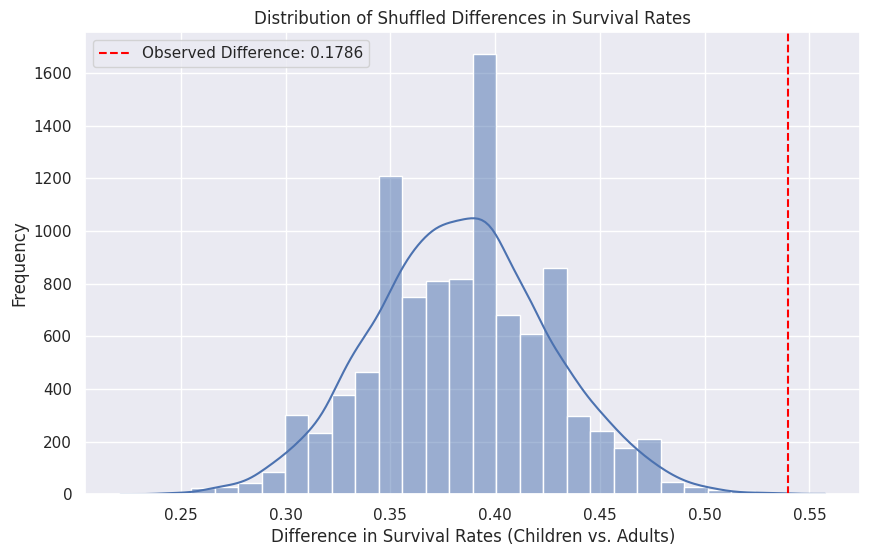

In [51]:
# Media
plt.figure(figsize=(10, 6))
sns.histplot(sim_titanic_1["Survived_mean_True"], kde=True, bins=30)
valor_real = df_titanic[df_titanic['is_child'] == True]['Survived'].mean()
plt.axvline(valor_real, color='red', linestyle='--', label=f'Observed Difference: {diff_obs:.4f}')
plt.title('Distribution of Shuffled Differences in Survival Rates')
plt.xlabel('Difference in Survival Rates (Children vs. Adults)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#### PASO 6: p-value
Calcula el p-valor, que es la proporción de simulaciones de shuffling en las que la diferencia aleatoria fue igual o más extrema que la diferencia observada. Un p-valor bajo indicará que la asociación observada es poco probable que se deba al azar, lo que aumenta la confianza en que la asociación es real.


In [52]:
np.sum(np.abs(sim_titanic_1["Survived_mean_True"]) >= abs(valor_real))/10000

np.float64(0.0005)